# important library imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load wine Dataset

In [3]:
df = pd.read_csv('winequality-red-infynas.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# About The Dataset

* check its features name and shape of dataset

In [4]:
print(f'The shape of dataset is : \n   * Columns: {df.shape[1]} \n   * Rows: {df.shape[0]}')
column = df.columns
print("Name of all Features present in dataset")
for col in column:
    print(f'    * {col}')

The shape of dataset is : 
   * Columns: 12 
   * Rows: 1599
Name of all Features present in dataset
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
    * quality


* Types of data type available

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We observe that
* The dataset contains 1599 examples with 12 features.
* All features are numerical features encoded as floating point numbersexcept one feature "Quality" which is also our target.
* There are no missing values in any features - the `Non-Null` is equal to the number of examples in the training set.

# Split Taraget and feature

In [6]:
features = df.drop('quality',axis=1)
target = df['quality']

# Feature and Target Histogram

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

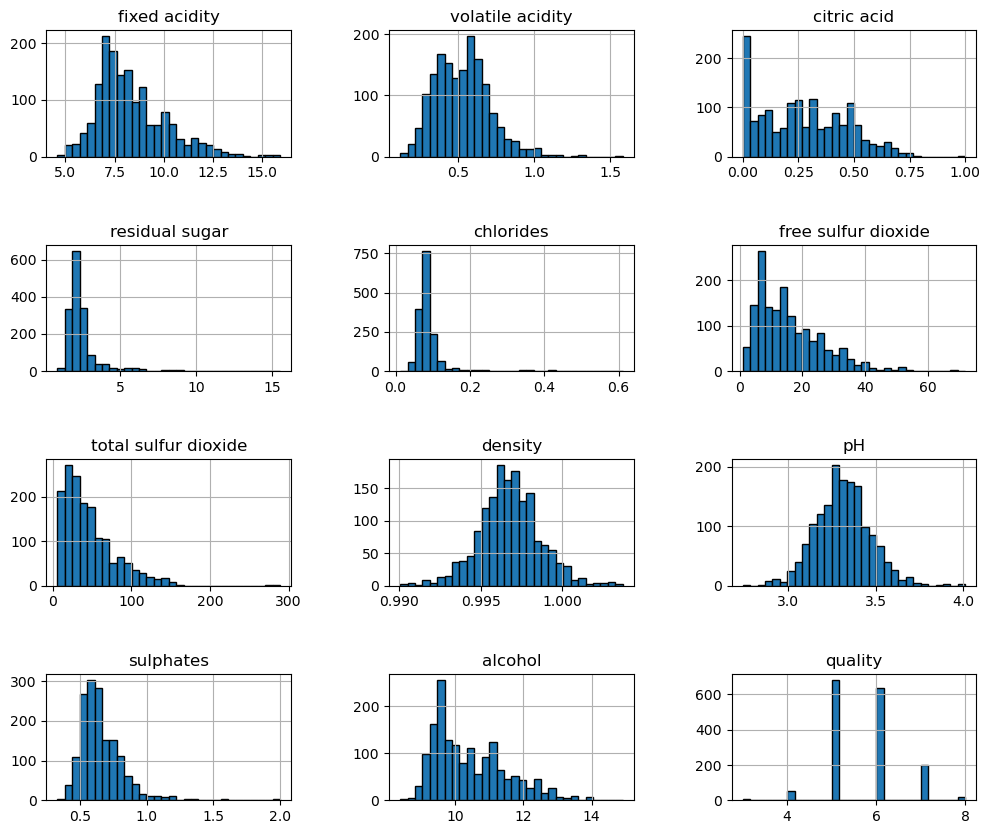

In [8]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

##  Let's observe these histograms and note down our findings:

- **fixed acidity** shows a slightly right-skewed distribution with most wines clustered between 6 and 8. Few samples have very high acidity, indicating possible outliers.

- **volatile acidity** appears approximately normally distributed but slightly left-skewed. Most wines have values between 0.3 and 0.6.

- **citric acid** is right-skewed. A large number of wines have very low citric acid content, and only a few have high concentrations.

- **residual sugar** has a strong right skew with a sharp peak near 2 g/L. There are some wines with very high sugar content, suggesting outliers.

- **chlorides** is also right-skewed. Most wines have low chloride levels (around 0.05–0.1), with a long tail indicating higher salt content in a few samples.

- **free sulfur dioxide** shows a right-skewed distribution. A large concentration of wines has low free SO₂ levels, with a gradual decline as levels increase.

- **total sulfur dioxide** follows a similar right-skewed pattern with a majority of values under 150 mg/L, and a few higher outliers.

- **density** has a sharp peak between 0.994 and 0.997, forming a normal-like curve, which is expected for wine. Extreme densities are rare.

- **pH** appears normally distributed with most values centered around 3.2–3.3, showing typical acidity levels for wine.

- **sulphates** is right-skewed. Most wines have sulphate values below 1.0, with a few high sulphate wines (possible preservatives).

- **alcohol** shows a right-skewed distribution. Most wines have alcohol content between 9% and 11.5%, with some outliers having higher alcohol levels.

- **quality** is a discrete variable and shows a **multimodal** distribution. Most wines are rated 5, 6, or 7, with very few wines having very low or high quality ratings.

---

##  Summary Observations:

- Most **features are right-skewed**, indicating the presence of outliers or long tails.
- **pH** and **density** are more symmetric and centered around a mean.
- Features like **residual sugar**, **total sulfur dioxide**, and **alcohol** may benefit from scaling or log transformation due to their skewness.


# Features and Target Statistcs

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can observe that there is a large difference between `75%` and `max` values of `free sulfur dioxide`, `total sulfer dioxide` - which confirms our intuition about presence of outliers or extreme values in these features.

# Boxplot for Oultilers in 
   * free sulfur dioxide
   * total sulfur dioxide

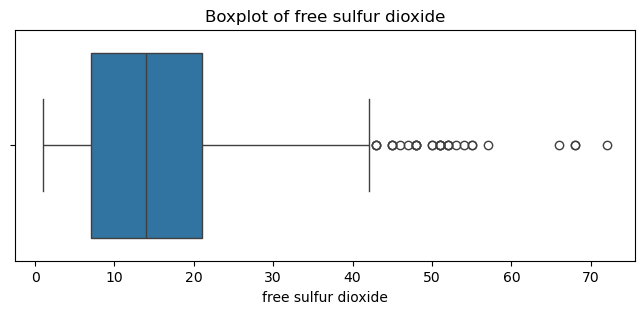

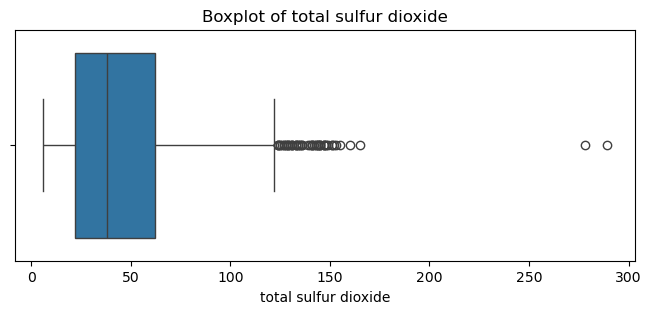

In [10]:

col = ['free sulfur dioxide','total sulfur dioxide']
# Create a boxplot for each numeric column
for column in col:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

* Using IQR Method to find outliears

In [11]:
columns = col = ['free sulfur dioxide','total sulfur dioxide']
outliers = {}
outliers_col =[]
for col in columns:  
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    
    outliers_indices = df[col].index[(df[col] < lower) | (df[col] > upper)] 
    if not outliers_indices.empty:
        outliers[col] = df.loc[outliers_indices, col]
        print(f"\nOutliers in '{col}' (IQR Method): \n  lower bound: {lower} \n  upper bound: {upper} ")
        print(outliers[col])
        outliers_col.append(col)
    else:
        print(f'\nNo outliers in column:  {col}')


Outliers in 'free sulfur dioxide' (IQR Method): 
  lower bound: -14.0 
  upper bound: 42.0 
14      52.0
15      51.0
57      50.0
396     68.0
400     68.0
497     43.0
522     47.0
584     54.0
634     46.0
678     45.0
925     53.0
926     52.0
982     51.0
1075    45.0
1131    57.0
1154    50.0
1156    45.0
1175    48.0
1217    43.0
1231    48.0
1244    72.0
1256    43.0
1295    51.0
1296    51.0
1358    52.0
1434    55.0
1435    55.0
1474    48.0
1476    48.0
1558    66.0
Name: free sulfur dioxide, dtype: float64

Outliers in 'total sulfur dioxide' (IQR Method): 
  lower bound: -38.0 
  upper bound: 122.0 
14      145.0
15      148.0
86      136.0
88      125.0
90      140.0
91      136.0
92      133.0
109     153.0
130     134.0
145     141.0
154     129.0
155     128.0
156     129.0
157     128.0
188     143.0
189     144.0
190     127.0
192     126.0
201     145.0
219     144.0
313     135.0
354     165.0
396     124.0
400     124.0
415     134.0
417     124.0
463     129.0
51

In [12]:
for col in outliers_col:
    print(f"% of outlier data due to {col} column: {outliers[col].shape[0]/df[col].shape[0]}%")
    

% of outlier data due to free sulfur dioxide column: 0.01876172607879925%
% of outlier data due to total sulfur dioxide column: 0.03439649781113196%


* As there is very less percentage of data is outliears so we can remove this

In [13]:
all_outlier_indices = set()

for col in outliers:
    all_outlier_indices.update(outliers[col].index)
df_new = df.drop(index=list(all_outlier_indices))

# Boxplot after removing outliers

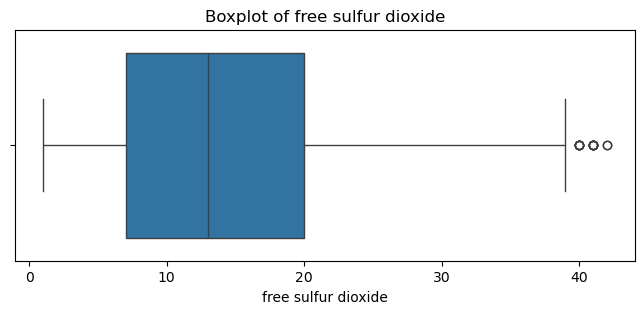

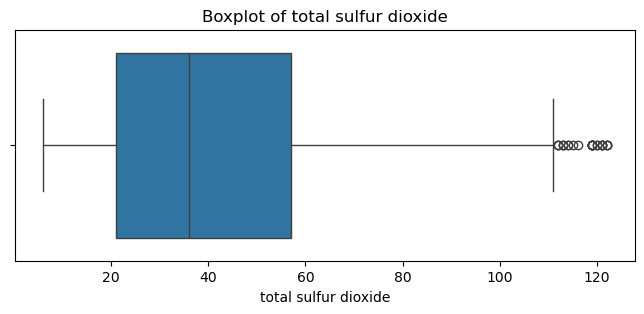

In [14]:
col = ['free sulfur dioxide','total sulfur dioxide']
for column in col:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df_new[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [15]:
df_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,8.330112,0.527035,0.269165,2.470217,0.086997,14.749178,42.375411,0.996723,3.314017,0.655404,10.445201,5.652202
std,1.765641,0.178420,0.196327,1.198872,0.047384,8.955246,26.870873,0.001865,0.154546,0.157529,1.068952,0.813138
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.640000,0.430000,2.600000,0.090000,20.000000,57.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,42.000000,122.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [16]:
df_new.shape

(1521, 12)

# Data Preprocessing


* Update the quality column as
   * wines with quality ≥ 7 as 'good' (1) and the rest as 'not good' (0)

In [17]:
df_new['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df_new.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [18]:
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(features)

# Split the Datset into train and test

In [19]:
features = df_new.drop('quality',axis=1)
target = df_new['quality']

# Split into train and test
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (1064, 11)
Training target vector size: (1064,)
Test feature matrix size: (457, 11)
Test target vector size: (457,)


## scaling the Data using standard scaler

In [20]:
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


# Model Building

## Logestic Regression

In [21]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)
y_pred=log_reg.predict(x_test_scaled)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8840262582056893


Confusion matrix of Logistics Regression : 
 [[385  15]
 [ 38  19]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       400
           1       0.56      0.33      0.42        57

    accuracy                           0.88       457
   macro avg       0.73      0.65      0.68       457
weighted avg       0.87      0.88      0.87       457



In [22]:
CVscore = cross_val_score(log_reg, x_train_scaled, y_train, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.84976526 0.85915493 0.87793427 0.89201878 0.90566038]
Mean CV Score : 0.8769067233590221
Std deviation : 0.0205328421012659


## Decision Tree Classifier

In [23]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
y_pred=dtc.predict(x_test_scaled)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8533916849015317


Confusion matrix of Decision Tree Classifier : 
 [[366  34]
 [ 33  24]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       400
           1       0.41      0.42      0.42        57

    accuracy                           0.85       457
   macro avg       0.67      0.67      0.67       457
weighted avg       0.85      0.85      0.85       457



* Cross validation score 

In [24]:
CVscore = cross_val_score(dtc, x_train_scaled, y_train, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.84507042 0.87793427 0.85915493 0.90140845 0.88207547]
Mean CV Score : 0.8731287093630968
Std deviation : 0.01941862890607207


##  Hyper Parameter Tuning : GridSearchCV

* Logestic Regression HPT

In [25]:
parameter = [{'fit_intercept': [True, False], #default: True
            'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': [42]
             }]

In [26]:
GCV = GridSearchCV(LogisticRegression(),parameter,verbose=5)
GCV.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=42, solver=l

n:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "n:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "n:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "n:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [42],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [27]:
GCV.best_params_

{'fit_intercept': True,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

Check Logistic regression using these all hyperparameter

In [28]:
lg_hpt = LogisticRegression(fit_intercept =True,penalty= "l2",solver='newton-cg',random_state= 69)
lg_hpt.fit(x_train_scaled,y_train)
y_pred=lg_hpt.predict(x_test_scaled)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.8840262582056893


Confusion matrix of Random Forest Classifier : 
 [[385  15]
 [ 38  19]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       400
           1       0.56      0.33      0.42        57

    accuracy                           0.88       457
   macro avg       0.73      0.65      0.68       457
weighted avg       0.87      0.88      0.87       457



* Decisiom tree HPT

In [29]:
parameter = {
'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'splitter': ['best', 'random']                      # best (default) or random split
}

In [30]:
GCV_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      parameter,
                      verbose=5,
                      n_jobs=-1,
                      cv=5)
GCV_dt.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=5)

In [31]:
GCV_dt.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Check Decission tree Classifire model with these hyperparameter

In [32]:
Final_mod = DecisionTreeClassifier(class_weight=None,
                                   criterion='gini',
                                   max_depth=5,
                                   max_features=None,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   splitter='best',
                                   random_state= 42)
Final_mod.fit(x_train_scaled,y_train)
y_pred=Final_mod.predict(x_test_scaled)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.8555798687089715


Confusion matrix of Random Forest Classifier : 
 [[368  32]
 [ 34  23]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       400
           1       0.42      0.40      0.41        57

    accuracy                           0.86       457
   macro avg       0.67      0.66      0.66       457
weighted avg       0.85      0.86      0.85       457



# Final Model

* now the final model will be Logestic regreession with Hyperparameter which are follow
   * 'fit_intercept': True,
   * 'penalty': 'l1',
   * 'random_state': 42,
   * 'solver': 'liblinear'


In [38]:
Final_mod = LogisticRegression(fit_intercept =True,penalty= "l2",solver='liblinear',random_state= 42)
Final_mod.fit(x_train_scaled,y_train)
y_pred=Final_mod.predict(x_test_scaled)
print('\033[1m'+'Final Logestic Regression Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logestic Regression Model :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Logestic Regression Model'+'\033[0m \n',classification_report(y_test, y_pred))

Final Logestic Regression Model
Accuracy Score :
 0.8840262582056893


Confusion matrix of Logestic Regression Model : 
 [[385  15]
 [ 38  19]]


Classification Report of Logestic Regression Model 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       400
           1       0.56      0.33      0.42        57

    accuracy                           0.88       457
   macro avg       0.73      0.65      0.68       457
weighted avg       0.87      0.88      0.87       457



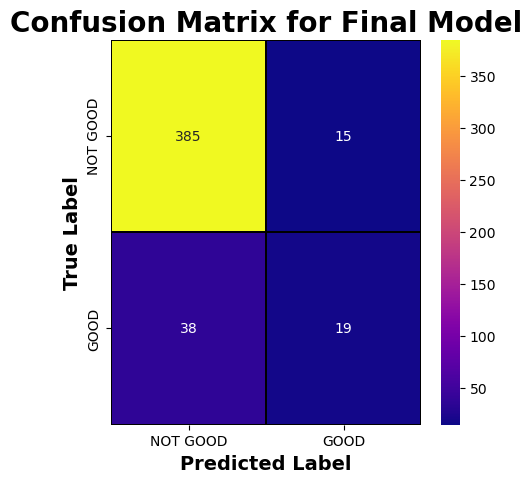

In [39]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(y_test, y_pred)

x_labels = ["NOT GOOD","GOOD"]
y_labels = ["NOT GOOD","GOOD"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

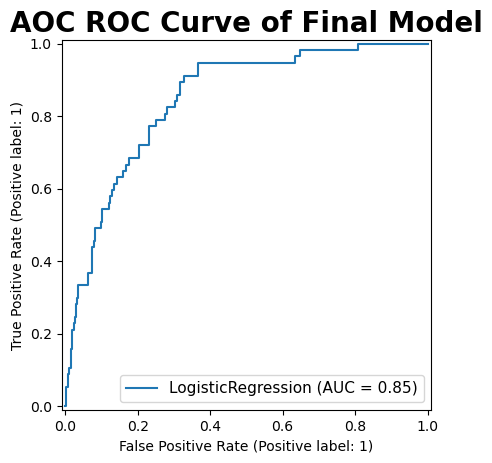

Auc Score :
 0.6479166666666666


In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(Final_mod,x_test_scaled,y_test)
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, Final_mod.predict(x_test_scaled))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)